In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import math

In [2]:
uber_data = pd.read_csv("My Uber Drives - 2016.csv.xls")

In [127]:
uber_data["dummy"] = np.zeros((1155,))

In [128]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,dummy
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0.0
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,0.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0.0
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0.0
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0.0
...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,0.0
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0.0
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,0.0
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,0.0


In [4]:
uber_data.drop(1155,inplace=True)

In [5]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
#1. Total no of rides
uber_data.shape[0]

1155

In [7]:
#1,1,1,2,2,3,4,3,5,5,6,7,7,7,8
#Distinct => 1,2,3,4,5,6,7,8
#Unique => 4,6

In [8]:
#2. What are all the distinct places from which the rides start.
distinct_places = set(uber_data["START*"].to_list())

In [9]:
distinct_places = uber_data["START*"].unique()

In [10]:
#3. Total no of distinct places
len(distinct_places)

177

In [11]:
places = uber_data["START*"].to_list()

In [12]:
place_count = {}
for place in distinct_places:
    place_count[place] = 0
for place in places:
    place_count[place] += 1
# Time Complexity = O(n)

In [13]:
places_np = uber_data["START*"].to_numpy()

In [14]:
(places_np=="Fort Pierce").sum()

5

In [15]:
place_count = {}
for place in distinct_places:
    place_count[place] = ((places_np) == place).sum()

In [16]:
sorted(list(map(lambda x:((places_np) == x).sum(),distinct_places)))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 10,
 10,
 11,
 11,
 11,
 14,
 16,
 17,
 17,
 27,
 28,
 36,
 37,
 57,
 68,
 85,
 148,
 201]

In [17]:
place_count

{'Fort Pierce': 5,
 'West Palm Beach': 2,
 'Cary': 201,
 'Jamaica': 2,
 'New York': 4,
 'Elmhurst': 1,
 'Midtown': 14,
 'East Harlem': 1,
 'Flatiron District': 1,
 'Midtown East': 1,
 'Hudson Square': 2,
 'Lower Manhattan': 1,
 "Hell's Kitchen": 1,
 'Downtown': 9,
 'Gulfton': 1,
 'Houston': 5,
 'Eagan Park': 1,
 'Morrisville': 85,
 'Durham': 37,
 'Farmington Woods': 2,
 'Whitebridge': 68,
 'Lake Wellingborough': 1,
 'Fayetteville Street': 3,
 'Raleigh': 28,
 'Hazelwood': 7,
 'Fairmont': 1,
 'Meredith Townes': 3,
 'Apex': 17,
 'Chapel Hill': 2,
 'Northwoods': 3,
 'Edgehill Farms': 8,
 'Tanglewood': 4,
 'Preston': 6,
 'Eastgate': 1,
 'East Elmhurst': 2,
 'Jackson Heights': 1,
 'Long Island City': 1,
 'Katunayaka': 2,
 'Unknown Location': 148,
 'Colombo': 8,
 'Nugegoda': 1,
 'Islamabad': 57,
 'R?walpindi': 11,
 'Noorpur Shahan': 5,
 'Heritage Pines': 2,
 'Westpark Place': 17,
 'Waverly Place': 4,
 'Wayne Ridge': 4,
 'Weston': 2,
 'East Austin': 1,
 'West University': 2,
 'South Congress':

In [18]:
place_count["Cary"]

201

In [19]:
place_count = {}
for place in distinct_places:
    place_count[place] = [places.count(place)]
place_count_df = pd.DataFrame(place_count).T
place_count_df.rename(columns={0:"count"},inplace=True)
place_count_df

,count
Fort Pierce,5
West Palm Beach,2
Cary,201
Jamaica,2
New York,4
...,...
Fuquay-Varina,1
Rawalpindi,5
Kar?chi,27
Katunayake,1


In [20]:
#Which place is most starting place
max_city = place_count_df.sort_values(by="count",ascending=False).iloc[0]
max_city.name,max_city.values[0]

('Cary', 201)

In [21]:
place_count_df2 = pd.DataFrame(list(map(lambda x:places.count(x),distinct_places)))
place_count_df2.index = distinct_places
place_count_df2.rename(columns={0:"count"},inplace=True)
place_count_df2

,count
Fort Pierce,5
West Palm Beach,2
Cary,201
Jamaica,2
New York,4
...,...
Fuquay-Varina,1
Rawalpindi,5
Kar?chi,27
Katunayake,1


In [22]:
place_count_df3 = pd.DataFrame(uber_data["START*"].value_counts())
place_count_df3

,count
START*,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Florence,1
Ridgeland,1
Daytona Beach,1


In [25]:
arr = np.random.rand(128,128)

In [26]:
plt.imsave("arr.png",arr)

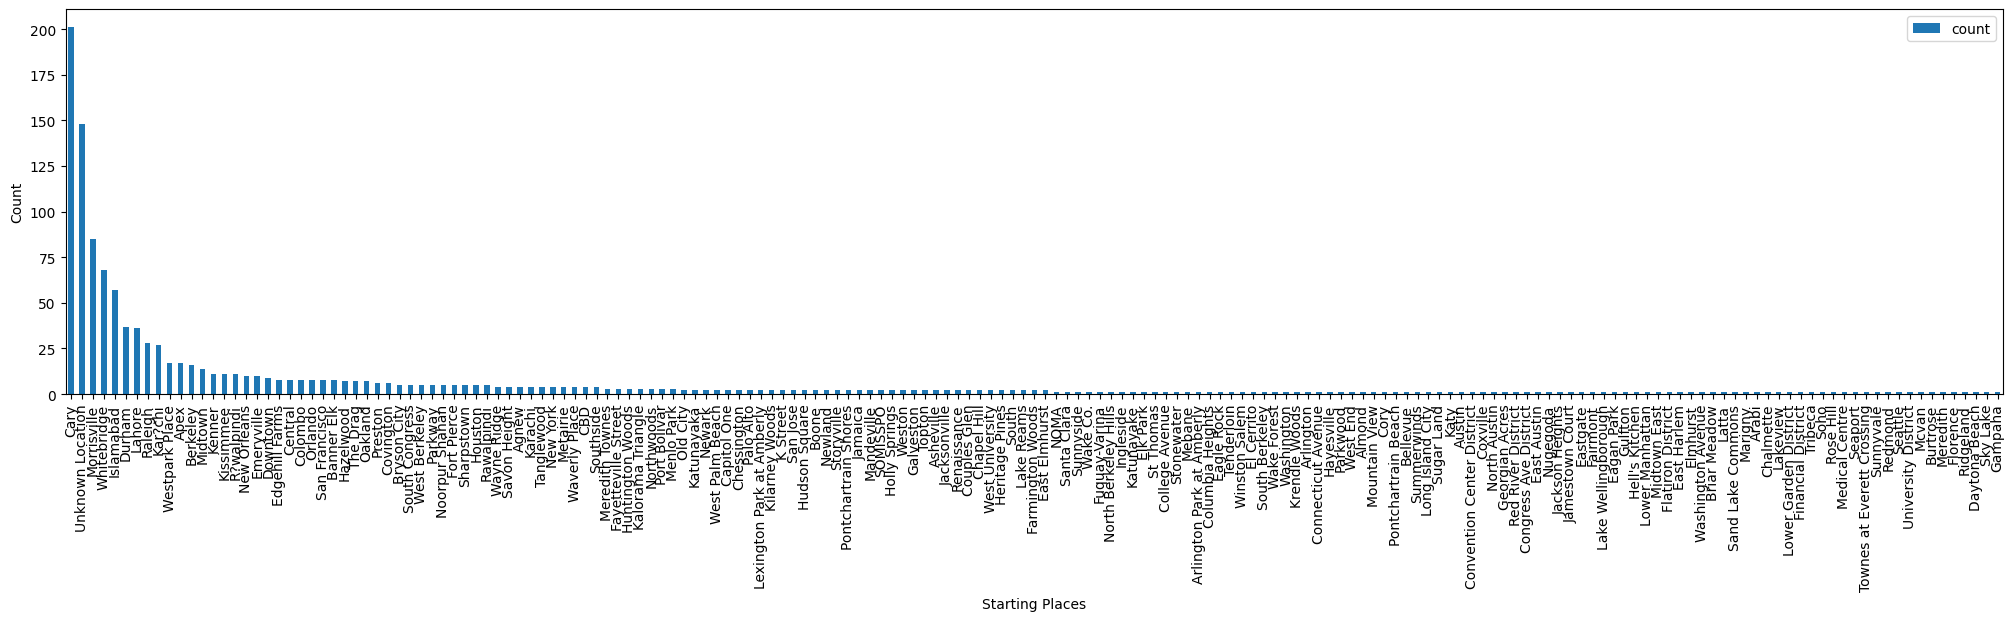

In [41]:
place_count_df3.plot.bar(figsize=(25,5))
plt.xlabel("Starting Places")
plt.ylabel("Count")

plt.savefig("fig.png")

In [98]:
max_city = place_count_df3.iloc[0]
max_city.name,max_city.values[0]

('Cary', 201)

In [ ]:
place_count = {}
for place in distinct_places:
    place_count[place] 

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [75]:
np.unique(np.array(places))

array(['Agnew', 'Almond', 'Apex', 'Arabi', 'Arlington',
       'Arlington Park at Amberly', 'Asheville', 'Austin', 'Banner Elk',
       'Bellevue', 'Berkeley', 'Boone', 'Briar Meadow', 'Bryson City',
       'Burtrose', 'CBD', 'Capitol One', 'Cary', 'Central', 'Chalmette',
       'Chapel Hill', 'Chessington', 'College Avenue', 'Colombo',
       'Columbia Heights', 'Congress Ave District', 'Connecticut Avenue',
       'Convention Center District', 'Cory', 'Couples Glen', 'Covington',
       'Coxville', 'Daytona Beach', 'Downtown', 'Durham', 'Eagan Park',
       'Eagle Rock', 'East Austin', 'East Elmhurst', 'East Harlem',
       'Eastgate', 'Edgehill Farms', 'El Cerrito', 'Elk Park', 'Elmhurst',
       'Emeryville', 'Fairmont', 'Farmington Woods',
       'Fayetteville Street', 'Financial District', 'Flatiron District',
       'Florence', 'Fort Pierce', 'Fuquay-Varina', 'Galveston', 'Gampaha',
       'Georgian Acres', 'Gulfton', 'Hayesville', 'Hazelwood',
       "Hell's Kitchen", 'Heritage

In [63]:
place_count_df2.index = distinct_places

In [64]:
place_count_df2

,0
Fort Pierce,5
West Palm Beach,2
Cary,201
Jamaica,2
New York,4
...,...
Fuquay-Varina,1
Rawalpindi,5
Kar?chi,27
Katunayake,1


In [48]:
#pd.DataFrame({key:[val] for key,val in place_count.items()})

,Fort Pierce,West Palm Beach,Cary,Jamaica,New York,Elmhurst,Midtown,East Harlem,Flatiron District,Midtown East,...,South Berkeley,Mountain View,El Cerrito,Krendle Woods,Wake Co.,Fuquay-Varina,Rawalpindi,Kar?chi,Katunayake,Gampaha
0,5,2,201,2,4,1,14,1,1,1,...,1,1,1,1,1,1,5,27,1,1


In [57]:
place_count_df

,count
Fort Pierce,5
West Palm Beach,2
Cary,201
Jamaica,2
New York,4
...,...
Fuquay-Varina,1
Rawalpindi,5
Kar?chi,27
Katunayake,1


In [45]:
#pd.DataFrame(place_count,index=["count"])

,Fort Pierce,West Palm Beach,Cary,Jamaica,New York,Elmhurst,Midtown,East Harlem,Flatiron District,Midtown East,...,South Berkeley,Mountain View,El Cerrito,Krendle Woods,Wake Co.,Fuquay-Varina,Rawalpindi,Kar?chi,Katunayake,Gampaha
count,5,2,201,2,4,1,14,1,1,1,...,1,1,1,1,1,1,5,27,1,1


In [28]:
uber_data["START*"]!=uber_data["STOP*"]

0       False
1       False
2       False
3       False
4        True
        ...  
1150    False
1151     True
1152    False
1153     True
1154     True
Length: 1155, dtype: bool

In [67]:
uber_data["STOP*"].value_counts()

STOP*
Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: count, Length: 188, dtype: int64

In [69]:
uber_data["STOP*"].value_counts().loc[uber_data["STOP*"].value_counts()<5]

STOP*
Wayne Ridge          4
Agnew                4
Fort Pierce          4
Kalorama Triangle    4
New York             4
                    ..
Daytona Beach        1
Sand Lake Commons    1
Sky Lake             1
Vista East           1
Ilukwatta            1
Name: count, Length: 148, dtype: int64

In [68]:
uber_data["STOP*"].value_counts()<5

STOP*
Cary                 False
Unknown Location     False
Morrisville          False
Whitebridge          False
Islamabad            False
                     ...  
Daytona Beach         True
Sand Lake Commons     True
Sky Lake              True
Vista East            True
Ilukwatta             True
Name: count, Length: 188, dtype: bool

In [61]:
)uber_data["STOP*"]

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4        West Palm Beach
              ...       
1150             Kar?chi
1151    Unknown Location
1152    Unknown Location
1153             Gampaha
1154           Ilukwatta
Name: STOP*, Length: 1155, dtype: object

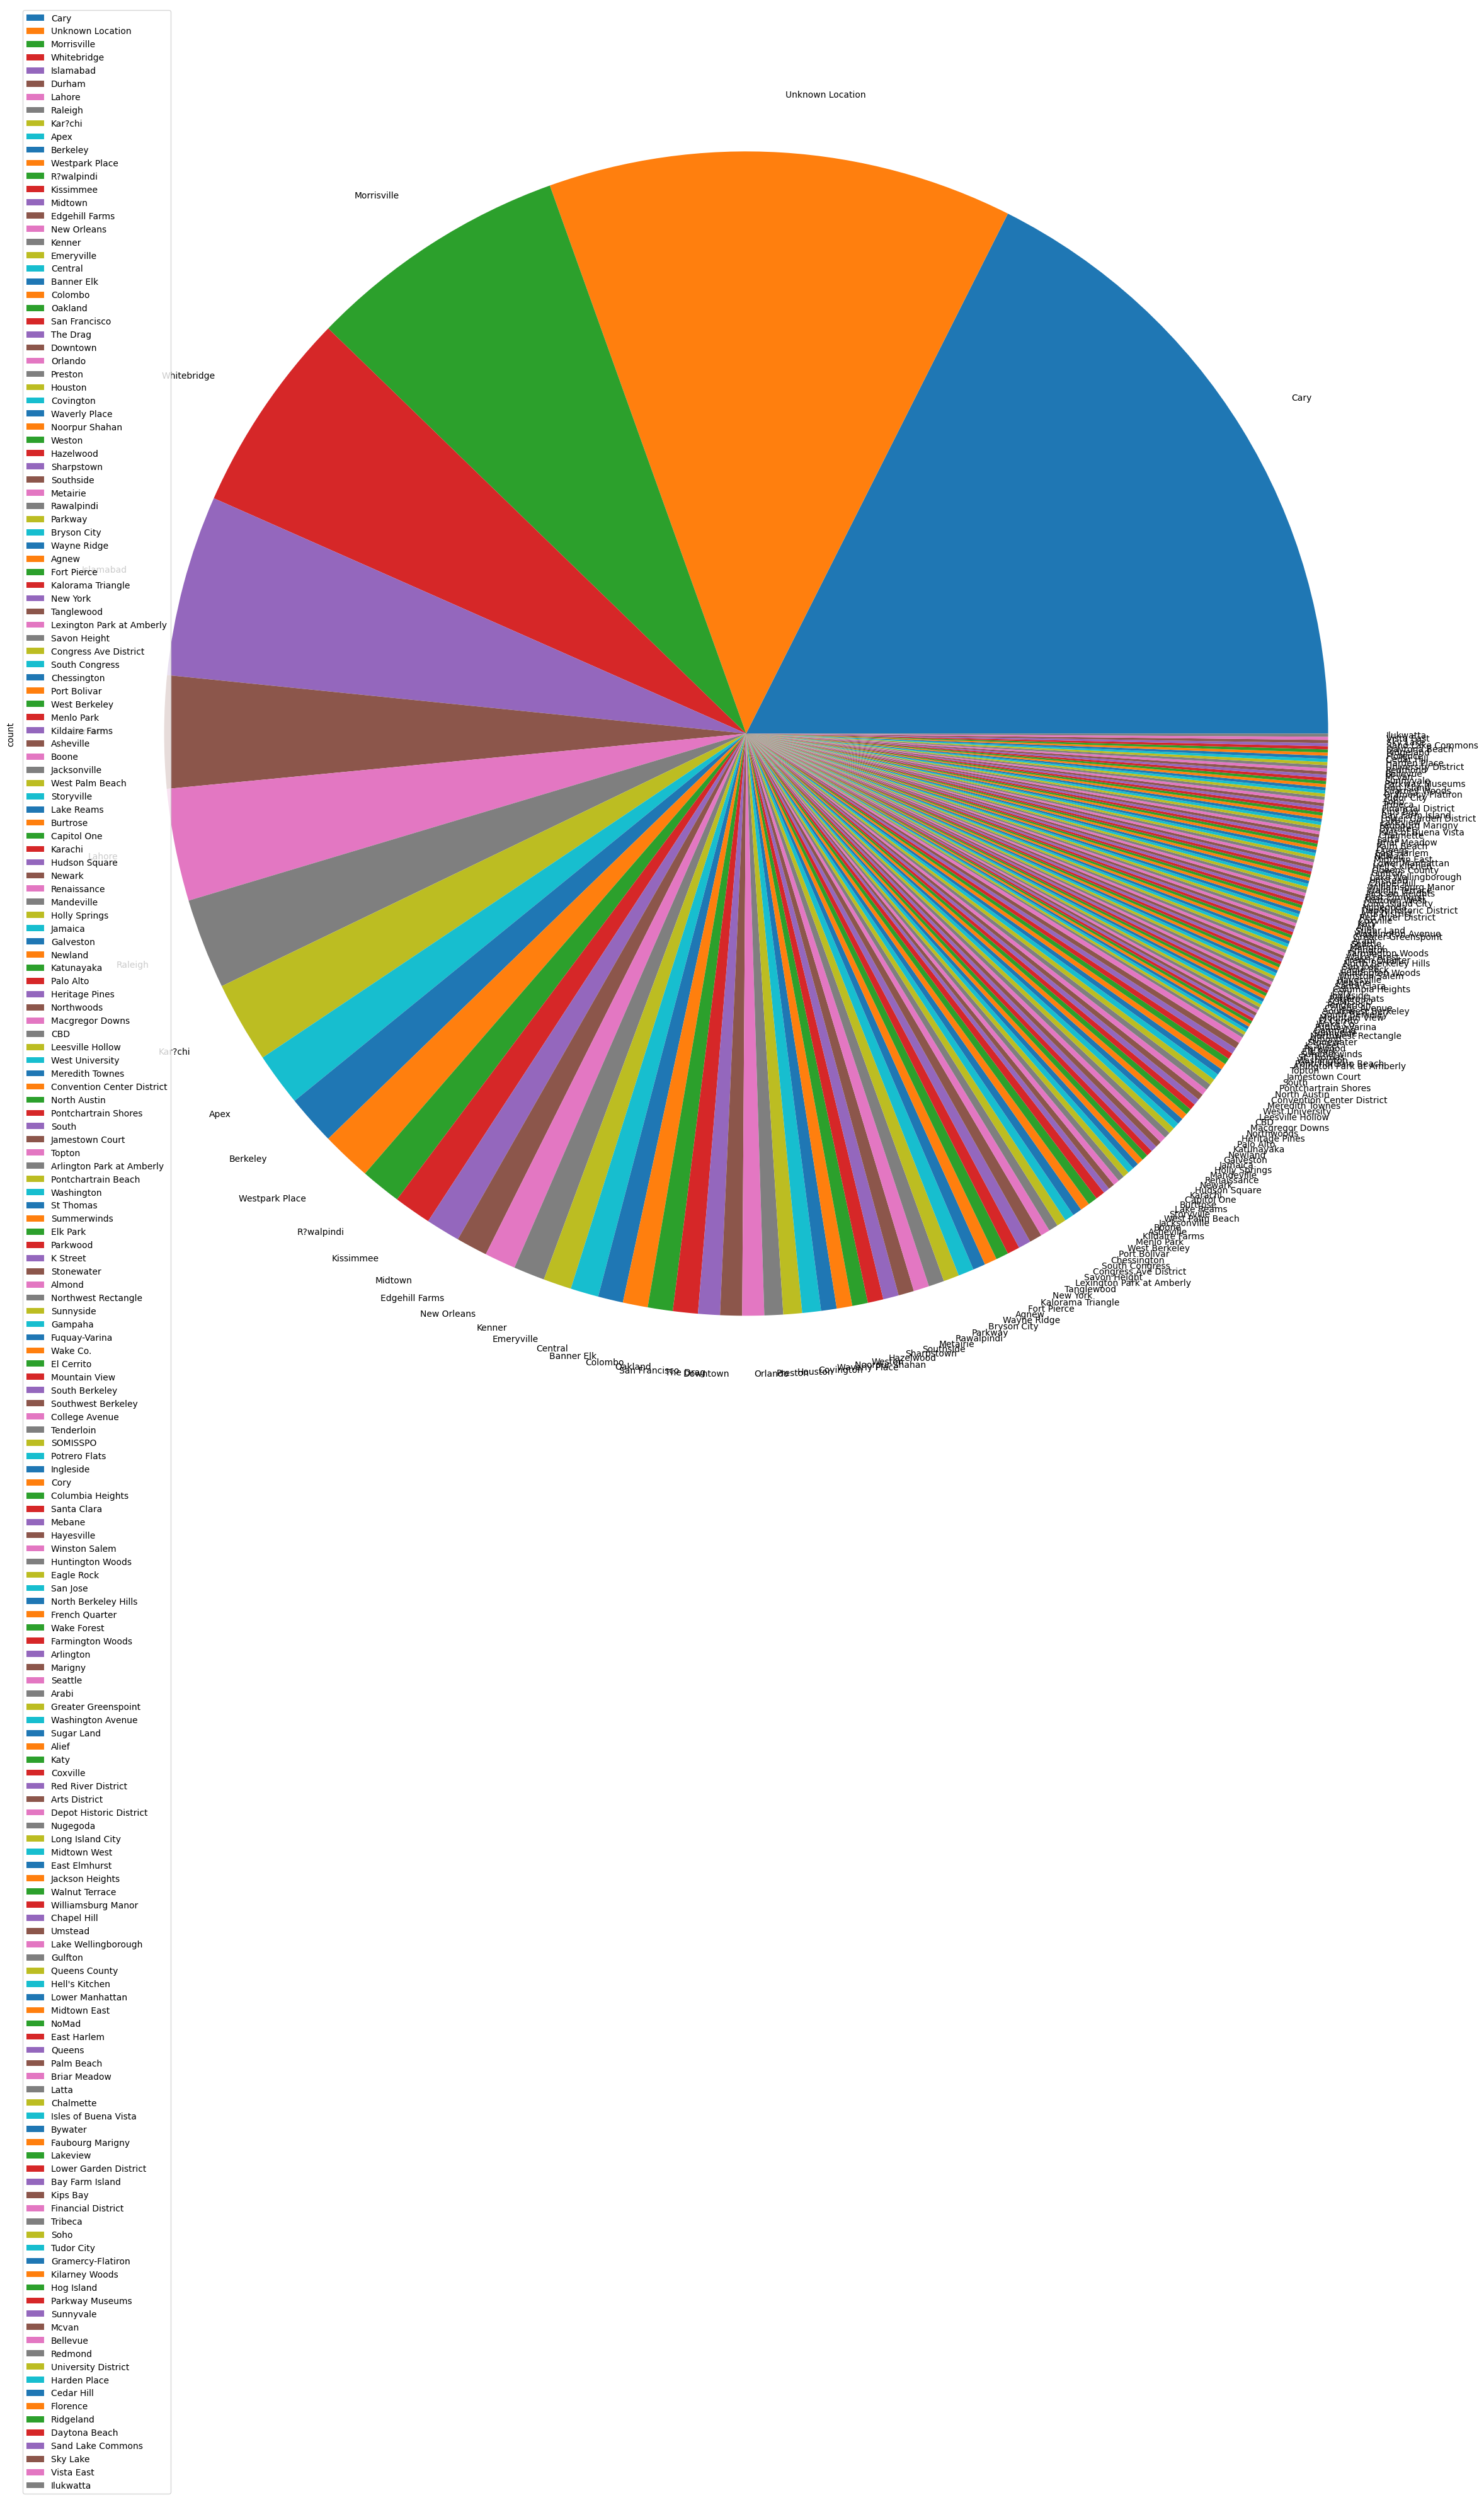

In [71]:
((uber_data["STOP*"].value_counts()/len(uber_data))*100).plot.pie(figsize=(30,30))
plt.legend()

In [30]:
uber_data["START*"].value_counts()

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

In [35]:
len(uber_data["STOP*"].unique())

188

In [42]:
set(set(uber_data["STOP*"])-set(uber_data["START*"]))

{'Alief',
 'Arts District',
 'Bay Farm Island',
 'Bywater',
 'Cedar Hill',
 'Depot Historic District',
 'Faubourg Marigny',
 'French Quarter',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Harden Place',
 'Hog Island',
 'Ilukwatta',
 'Isles of Buena Vista',
 'Kildaire Farms',
 'Kips Bay',
 'Leesville Hollow',
 'Macgregor Downs',
 'Midtown West',
 'NoMad',
 'Northwest Rectangle',
 'Palm Beach',
 'Parkway Museums',
 'Potrero Flats',
 'Queens',
 'Queens County',
 'Southwest Berkeley',
 'Tudor City',
 'Umstead',
 'Vista East',
 'Walnut Terrace',
 'Williamsburg Manor'}

In [37]:
len(uber_data["START*"].unique())

177

In [38]:
188-177

11

In [74]:
round((uber_data["PURPOSE*"].value_counts()/len(uber_data))*100,2)

PURPOSE*
Meeting            16.19
Meal/Entertain     13.85
Errand/Supplies    11.08
Customer Visit      8.74
Temporary Site      4.33
Between Offices     1.56
Moving              0.35
Airport/Travel      0.26
Charity ($)         0.09
Commute             0.09
Name: count, dtype: float64

In [82]:
uber_data["PURPOSE*"].isna().sum()

502

In [81]:
1155-uber_data["PURPOSE*"].value_counts().sum()

502

In [84]:
uber_data["STOP*"].value_counts().sum()

1155

In [40]:
start_dates = pd.to_datetime(uber_data["START_DATE*"])

In [45]:
start_dates = uber_data["START_DATE*"]

In [49]:
start_dates

0         1/1/2016 21:11
1          1/2/2016 1:25
2         1/2/2016 20:25
3         1/5/2016 17:31
4         1/6/2016 14:42
              ...       
1150     12/31/2016 1:07
1151    12/31/2016 13:24
1152    12/31/2016 15:03
1153    12/31/2016 21:32
1154    12/31/2016 22:08
Name: START_DATE*, Length: 1155, dtype: object

In [60]:
times = []
for start_date in start_dates:
    time = start_date.split(" ")[1]
    hrs_mins = time.split(":")
    if int(hrs_mins[1]) > 30:
        time = int(hrs_mins[0])+1
    else:
        time = int(hrs_mins[0])
    times.append(time)

In [63]:
def get_time(datetime):
    time = datetime.split(" ")[1]
    hrs_mins = time.split(":")
    if int(hrs_mins[1]) > 30:
        time = int(hrs_mins[0])+1
    else:
        time = int(hrs_mins[0])
    return time

In [64]:
times = list(map(get_time,start_dates))

In [66]:
uber_data["START_DATE*"].apply(get_time)

0       21
1        1
2       20
3       18
4       15
        ..
1150     1
1151    13
1152    15
1153    22
1154    22
Name: START_DATE*, Length: 1155, dtype: int64

In [57]:
## 4:31 ==> 5
## 4:15 ==> 4

In [68]:
hours = uber_data["START_DATE*"].apply(lambda x:int(x.split(" ")[1].split(":")[0])+1 if int(x.split(" ")[1].split(":")[1])>30 else int(x.split(" ")[1].split(":")[0]))

In [69]:
hours

0       21
1        1
2       20
3       18
4       15
        ..
1150     1
1151    13
1152    15
1153    22
1154    22
Name: START_DATE*, Length: 1155, dtype: int64

In [70]:
groups = {
    "0-5":[],
    "6-10":[],
    "11-15":[],
    "16-20":[],
    "21-23":[]
}

In [73]:
mapper = {
    "0-5":[0,1,2,3,4,5],
    "6-10":[6,7,8,9,10],
    "11-15":[11,12,13,14,15],
    "16-20":[16,17,18,19,20],
    "21-23":[21,22,23]
}

In [74]:
for hour in hours:
    if hour >= 0 and hour <= 5:
        groups["0-5"].append(hour)
    elif hour >= 6 and hour <= 10:
        groups["6-10"].append(hour)
    elif hour >= 11 and hour <= 15:
        groups["11-15"].append(hour)
    elif hour >= 16 and hour <= 20:
        groups["16-20"].append(hour)
    else:
        groups["21-23"].append(hour)

In [79]:
len(groups["0-5"]),len(groups["6-10"]),len(groups["11-15"]),len(groups["16-20"]),len(groups["21-23"])

(31, 137, 415, 433, 139)

In [86]:
list(range(0,24,2.4))

TypeError: 'float' object cannot be interpreted as an integer

In [87]:
np.linspace(0,24,10)

array([ 0.        ,  2.66666667,  5.33333333,  8.        , 10.66666667,
       13.33333333, 16.        , 18.66666667, 21.33333333, 24.        ])

In [91]:
help(hours.plot.hist)

Help on method hist in module pandas.plotting._core:

hist(by=None, bins: 'int' = 10, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Draw one histogram of the DataFrame's columns.
    
    A histogram is a representation of the distribution of data.
    This function groups the values of all given Series in the DataFrame
    into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
    This is useful when the DataFrame's Series are in a similar scale.
    
    Parameters
    ----------
    by : str or sequence, optional
        Column in the DataFrame to group by.
    
        .. versionchanged:: 1.4.0
    
           Previously, `by` is silently ignore and makes no groupings
    
    bins : int, default 10
        Number of histogram bins to be used.
    **kwargs
        Additional keyword arguments are documented in
        :meth:`DataFrame.plot`.
    
    Returns
    -------
    class:`matplotlib.AxesSubplot`
        Return a histogram

In [117]:
xticks = np.linspace(0,24,10)

In [118]:
xticks = list(map(lambda x:round(x,2),list(xticks)))

In [121]:
xticks = list(map(lambda x:":".join([str(x).split(".")[0],str(round((int(str(x).split(".")[1])*0.6)))]),list(xticks)))

In [123]:
xticks = list(map(lambda x:float(x.replace(":",".")),xticks))

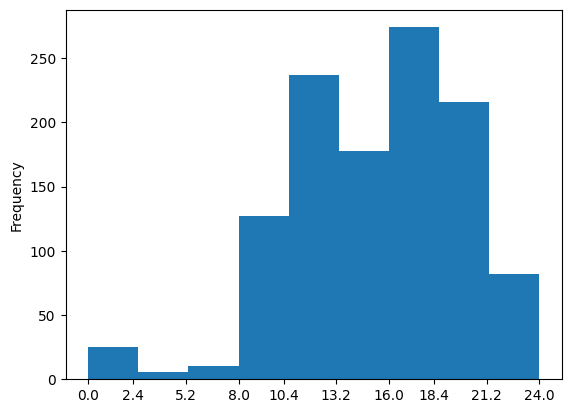

In [124]:
hours.plot.hist(bins=np.linspace(0,24,10))
plt.xticks(xticks)
plt.show()